# Lab 2

Author: Justin Ventura [[jventura3@gulls.salisbury.edu]]

Date: Thursday, September 12th, 2020.

## - Description -

Vector & Geometry classes used to graphically represent polygons with matplotlib.  Then a few methods for all of these including vector operations, cyclic test, and a test to see if a given point is in a polygon.  This is where every test and representation will be done.

### Vector Class

In [67]:
from math import sqrt

class Vector:
    """
    This class creates an R2 vector, that is, a
    vector with an x and y component.
    Default (x,y) -> (1,1)
    """
    def __init__(self, x: float = 0, y: float = 1):
        self._x = float(x)
        self._y = float(y)

    # Magic Methods:
    def __repr__(self):
        return 'Vector({}, {})'.format(self._x, self._y)

    def __getitem__(self, position: int) -> float:
        assert(position is 0 or position is 1)
        return float(self._x) if position is 0 else float(self._y)

    # Operator Overloads.
    def __add__(self, other):
        return Vector(self._x + other._x, self._y + other._y)

    def __sub__(self, other):
        return Vector(self._x - other._x, self._y - other._y)

    def __eq__(self, other) -> bool:
        return (self.coords() == other.coords())

    # Class Attribute Getters.
    def get_x(self) -> float:
        """ Returns x value as float. """
        return float(self._x)

    def get_y(self) -> float:
        """ Returns y value as float. """
        return float(self._y)

    def coords(self) -> tuple:
        """ Returns tuple with x and y values. """
        return (self._x, self._y)

    # Vector Operations.
    def dot_prod(self, _v) -> float:
        """ Computes the dot product of self & other vector. """
        return sum(u_i * v_i for u_i, v_i in zip(self.coords(), _v.coords()))

    def sum_of_squares(self, _v) -> float:
        """ This function computes v_1 * v_1 + ... v_n * v_n """
        return(_v.dot_prod(_v))

    def magnitude(self, _v) -> float:
        """ This function computes length/magnitude of v """
        return sqrt(self.sum_of_squares(_v))

    def distance(self, _v) -> float:
        """ This function computes the distance between vectors u and v """
        return self.magnitude(self - _v)

### Vector Class Operation Tests:
- Addition/Subtraction
- Dot Product
- Vector Distance

In [68]:
# Vectors:
v1, v2, v3, v4 = Vector(1,1), Vector(4, 2), Vector(9, 4), Vector(69, 4.20)
print(f'v1: {v1} | v2: {v2} | v3: {v3} | v4: {v4}\n')

# Addition & Subtraction Tests:
print('------ ADD / SUB ------')
print('v1 + v2 = ', v1 + v2)
print('v3 - v1 = ', v3 - v1)

# Dot Product Tests:
print('\n------ DOT  PROD ------')
print('v2 . v3 = ', v2.dot_prod(v3)) # Should result in 44
print('v1 . v4 = ', v1.dot_prod(v4)) # Should result in 73.2

# Vector Distance Tests:
print('\n------ VECT DIST ------')
print('|v1 v3| = ', v1.distance(v3)) # Should result in ~08.544
print('|v3 v4| = ', v3.distance(v4)) # Should result in ~60.003


v1: Vector(1.0, 1.0) | v2: Vector(4.0, 2.0) | v3: Vector(9.0, 4.0) | v4: Vector(69.0, 4.2)

------ ADD / SUB ------
v1 + v2 =  Vector(5.0, 3.0)
v3 - v1 =  Vector(8.0, 3.0)

------ DOT  PROD ------
v2 . v3 =  44.0
v1 . v4 =  73.2

------ VECT DIST ------
|v1 v3| =  8.54400374531753
|v3 v4| =  60.000333332407415


### Geometry Class

In [69]:
# For book keeping purposes.
import sys
from typing import List, Tuple

# Pascal naming because my pylinter would not shut up.
VectList = List[Vector]
EdgeList = List[Tuple[Vector, Vector]]

class Geometry:
    """
    geometry class to make a polygon of vectors.
    """
    # Magic Methods:
    def __init__(self, vertices: VectList = None, edges: EdgeList = None):
        """
        Only pass in 'vertices' and 'edges' if they create a proper
        polygon (open or closed).

        NOTE: Pass in vertices and edges together, otherwise errors will
        arise.
        """
        self._vertices = vertices
        self._edges = edges if edges else []
        self._last = vertices[-1] if vertices else None

    def __str__(self):
        return f'Vertices: {self._vertices}.\nEdges: {self._edges}'
    
    # Utility Methods:

    def _add_vertex(self, v: Vector) -> None:
        """
        This function takes a vector, and adds it to the class' list
        of vertices.
        """
        if self._vertices is None:
            self._vertices = [v]
            self._last = v
        else:
            self._vertices.append(v)

    def add_face(self, To: Vector = None) -> None:
        """
        This function takes a vector, then creates an edge between
        the two.  No duplicate edges allowed.
        """
        # Req 1: there must be a vertex to branch off.
        assert(self._vertices is not None), 'No vertices in geometry!'
        # Req 2: vector 2 exists.
        assert(To is not None), 'Adding a face requires a vector.'
        # Req 3: neither vectors connect already.
        assert((self._last, To) not in self._edges), 'Duplicate edges not allowed!'
        # Req 4: No self connecting edges.
        assert(To is not self._last), 'Cannot connect edge to self.'

        self._edges.append((self._last, To))
        self._last = To
        return None

    def is_closed(self) -> bool:
        """
        Determines if the given geometry is closed or not.  That is,
        if there is a path that goes from start, and returns back
        at some point.
        """
        return len(self._vertices) is len(self._edges)

    def _intersects(self, query: Vector, edge: Tuple[Vector, Vector]):
        """
        This function looks for intersections between the given
        query point, and a given edge from vectors u to v.

        NOTE: I did not come up with the 'Ray-Casting Algorithm,'
        this was explained in the lab instructions.
        """

        # Extract the two vectors passed in, these are the bounds.
        u, v = edge
        intersect = False

        # Makes it easier to generalize going low to high.
        if u.get_y() > v.get_y():
            u, v = v, u

        # NOTE: this takes care of the occasion that the ray passes through a
        # completely horizontal edge.  So if we increase the y by a small number,
        # the ray won't consider the passing as an intersection.
        if query.get_y() == u.get_y() or query.get_y() == v.get_y():
            query = Vector(query.get_x(), query.get_y() + 0.01)

        # Cases:
        # 1) If query x is greater than both u & v's x coords, then obviously there
        # is no intersection.
        # 2) Since the ray is horizontal, if the query point's y is less than the
        # lower vector's y (u), then there is no way the ray could intersect.
        # 3) Use the same logic in 2) for this.
        if (query.get_x() > max(u.get_x(), v.get_x()) or (query.get_y() < u.get_y() or query.get_y() > v.get_y())):
            return intersect # False
    
        # If the query's x value is less than u or v's, whichever is smaller 
        # then it will inevitably run into one of them at this point.  The
        # previous if-statement establishes that the query's y value is in
        # between that of u & v.
        if query.get_x() < min(u.get_x(), v.get_x()):
            return not intersect # True
        else:
            if abs(u.get_x() - v.get_x()) > sys.float_info.min:
                BAX = (v.get_y() - u.get_y()) / (1.0*(v.get_x() - u.get_x()))
            else:
                BAX = sys.float_info.max
            if abs(u.get_x() - query.get_x()) > sys.float_info.min:
                QAX = (query.get_y() - u.get_y()) / (1.0*(query.get_x() - u.get_x()))
            else:
                QAX = sys.float_info.max

            return QAX >= BAX
 
    def is_inside(self, query: Vector) -> bool:
        """
        Returns whether or not the given point (vector) is
        in the geometry.

        Algorithm: 
        1) shoot a ray from the query point.
        2) test the ray against every edge in the geometry:
            a) if the ray intersects, count++.
            b) if the ray never intersections, count unchanged.
        3) sum the intersections:
            1) if the sum is odd; point is in the geometry.
            2) if the sum is even; point lies outside geometry.
        """
        # NOTE: 'open' geometry's will raise an error, as this
        # algorithm will be inconclusive on such a shape.
        assert(self.is_closed is not True), 'Algorithm only works on closed geometrys!'

        query_copy = Vector(query.get_x(), query.get_y())

        # Call the helper method to perform calculations.
        intersections = sum(self._intersects(query_copy, edge) for edge in self._edges)
        return intersections % 2 == 1

# Setting up tests...

### Shape Plotting Method:

In [70]:
import matplotlib.pyplot as plt

def draw_polygon(poly: Geometry = None, q_point: List = None, name: str = 'polygon') -> None:
    """
    Draws the given polygon.  NOTE: q_point should be a list of two
    coordinates: [x, y].
    """
    x = [ [pair[0].get_x()] + [pair[1].get_x()] for pair in poly._edges ]
    y = [ [pair[0].get_y()] + [pair[1].get_y()] for pair in poly._edges ]

    plt.plot(x, y)
    if q_point is not None:
        plt.plot(q_point[0], q_point[1], marker='*', color="red")
    plt.title(f'Shape: {name}')
    plt.xlabel('X - Coords')
    plt.ylabel('Y - Coords')
    plt.axis('equal')
    plt.show()

### Creating shapes to plot...

|   Shape   	|  Query Point  	|    Interior   	|  Poly State  	|
|:---------:	|:-------------:	|:-------------:	|--------------	|
| Rectangle 	|    (3, 5.5)   	|      True     	|       Closed 	|
| Square    	|   (3.5, 7.5)    	|     False     	|       Closed 	|
| Triangle  	|     (7, 7)    	|      True     	|       Closed 	|
| Pentagon   	|    (3, 7)     	|      True     	|       Closed 	|
| Strange   	|     None      	|     False     	|         Open 	|


In [71]:
# QUERY POINTS:
query_points = [ [3, 2.5], [3.5, 7.5], [7, 7], [3, 7] ]

### Rectangle Demonstration:

Note that this point is clearly inside the rectangle as demonstrated in the graph.

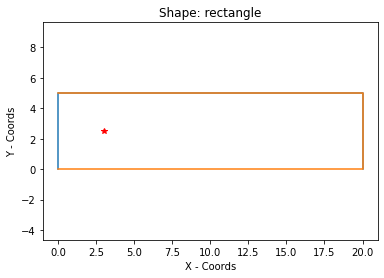

Query point is inside the shape!  Check the graph to confirm.


In [72]:
# Rectangle
vertices = [(0, 0), (0, 5), (20, 5), (20, 0)]
edges = [ ( (0, 0), (0, 5) ), ( (0, 5), (20, 5) ), ( (20, 5), (20, 0) ), ( (20, 0), (0, 0) ) ]

rect_v = [Vector(pair[0], pair[1]) for pair in vertices]
rect_e = [ ( Vector(pair[0][0], pair[0][1]), Vector(pair[1][0], pair[1][1]) ) for pair in edges]
rect = Geometry(rect_v, rect_e)

draw_polygon(rect, query_points[0], 'rectangle')
if rect.is_inside(Vector(query_points[0][0], query_points[0][1])):
    print('Query point is inside the shape!  Check the graph to confirm.')
else:
    print('The query point is outside the shape.')

### Square Demonstration:

Note that this is a special case of the ray casting algorithm.  Since the ray is being casted to the right, we can see that the ray would 'intersect' with the top edge of the square.  This is where the algorithm makes an adjustment; since the query point is to the left of both vertices of the edge (we know this by comparing x co-ordinates), and since the y value (7.5) is the same for all 3 vertices in question, we increment the point's y value by a small amount to ignore the upcoming edge.

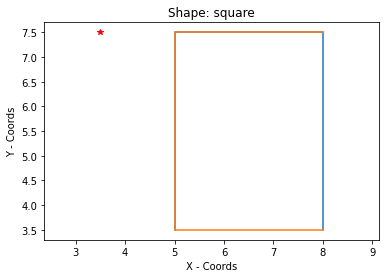

The query point is outside the shape.


In [73]:
# Square
vertices = [ (8, 3.5), (8, 7.5), (5, 7.5), (5, 3.5) ]
edges = [ ( (8, 3.5), (8, 7.5) ), ( (8, 7.5), (5, 7.5) ), ( (5, 7.5), (5, 3.5) ), ( (5, 3.5), (8       , 3.5) ) ]

sq_v = [Vector(pair[0], pair[1]) for pair in vertices]
sq_e = [ ( Vector(pair[0][0], pair[0][1]), Vector(pair[1][0], pair[1][1]) ) for pair in edges]
square = Geometry(sq_v, sq_e)

draw_polygon(square, query_points[1], 'square')
if square.is_inside(Vector(query_points[1][0], query_points[1][1])):
    print('Query point is inside the shape!  Check the graph to confirm.')
else:
    print('The query point is outside the shape.')

### Triangle Demonstration:

Another example where the given point is indeed in the shape.

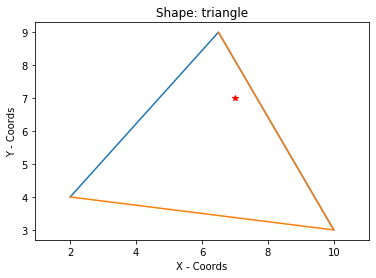

Query point is inside the shape!  Check the graph to confirm.


In [74]:
# Triangle
vertices = [ (2, 4), (6.5, 9), (10, 3) ]
edges = [ ( (2, 4), (6.5, 9) ), ( (6.5, 9), (10, 3) ), ( (10, 3), (2, 4) ) ]

tri_v = [Vector(pair[0], pair[1]) for pair in vertices]
tri_e = [ ( Vector(pair[0][0], pair[0][1]), Vector(pair[1][0], pair[1][1]) ) for pair in edges]
triangle = Geometry(tri_v, tri_e)

draw_polygon(triangle, query_points[2], 'triangle')
if triangle.is_inside(Vector(query_points[2][0], query_points[2][1])):
    print('Query point is inside the shape!  Check the graph to confirm.')
else:
    print('The query point is outside the shape.')

### Pentagon Demonstration:

As you can see, this is another example of a special case being considered.  This point's ray is casted to the right exactly through the vertex (4, 7) which is a part of 2 separate edges.  This is counted as just one intersection so that the point is not mistaken for being inside.  

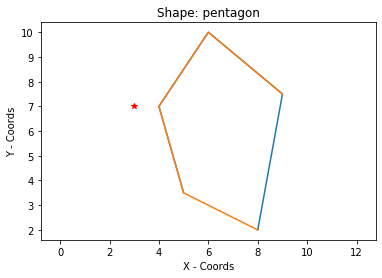

The query point is outside the shape.


In [75]:
# Pentagon
vertices = [ (8, 2), (9, 7.5), (6, 10), (4, 7), (5, 3.5) ]
edges = [ ( (8, 2), (9, 7.5) ), ( (9, 7.5), (6, 10) ), ( (6, 10), (4, 7) ), ( (4, 7), (5, 3.5) ), ( (5, 3.5), (8, 2) ) ]

pent_v = [Vector(pair[0], pair[1]) for pair in vertices]
pent_e = [ ( Vector(pair[0][0], pair[0][1]), Vector(pair[1][0], pair[1][1]) ) for pair in edges]
pentagon = Geometry(pent_v,pent_e)

draw_polygon(pentagon, query_points[3], 'pentagon')
if pentagon.is_inside(Vector(query_points[3][0], query_points[3][1])):
    print('Query point is inside the shape!  Check the graph to confirm.')
else:
    print('The query point is outside the shape.')

### Strange polygon.

This polygon is open, and we will not do a point test because for open polygons the algorithm will not work.  This is because being 'inside' and open polygon is not possible.  While I won't test it, if you were to attempt the is_inside() algorithm it would raise an Assertion Error since the polygon fails to be closed.

#### NOTE: This also demonstrates the functionality of the Geometry class.

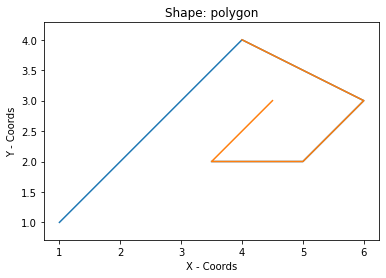

In [76]:
# Strange Open Polygon
vertices = [ (4, 4), (6, 3), (5, 2), (3.5, 2), (4.5, 3) ]
open_poly = Geometry()

open_poly._add_vertex(Vector(1, 1))
for pair in vertices:
    open_poly.add_face( Vector( (pair[0]), (pair[1]) ) )

draw_polygon(open_poly, None, 'polygon')